In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Math

sp.init_printing()

Solve the following optimization problem
$$
\begin{alignat*}{2}
    & \text{maximize: } && xy \\
    & \text{subject to: } && 
        \begin{aligned}[t]
             x+y^2 &\leq 2\\
            x,y &\geq 0 
        \end{aligned}
\end{alignat*}
$$   


### Step I

We try to draw the feasible region.

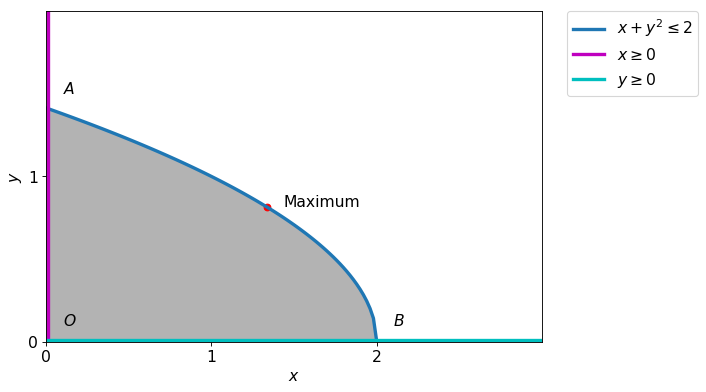

In [51]:
%matplotlib inline
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 14})

# plot the feasible region
d = np.linspace(0,3,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((x+y**2<=2) & (y>=0) & (x>=0)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

# plot the lines defining the constraints
x1 = np.linspace(0, 2, 100)
x = np.linspace(0, 3, 100)
y1 = np.sqrt(2 - x1)
y4 = x*0+0.01

# Annotation
plt.annotate('$A$', (0.1, 1.5))
plt.annotate('$B$', (2.1, 0.1))
plt.annotate('$O$', (0.1, 0.1))

# Make plot
plt.plot(x1, y1, label=r'$x+y^2\leq2$', linewidth=3)
plt.axvline(0.01, 0, 1, label=r'$x\geq0$', color='m', linewidth=3)
plt.plot(x, y4, label=r'$y\geq0$', color='c', linewidth=3)
plt.xlim(0,3)
plt.ylim(0,2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xticks(range(0,3))
plt.yticks(range(0,2))

# Maxima
plt.scatter(4/3, np.sqrt(2/3), color='r')
plt.annotate('Maximum', (4/3+0.1, np.sqrt(2/3)))
plt.show()

### Step II

Defining variable and functions.

In [35]:
x, y = sp.var('x,y',real=True);
f = x*y
g1 = 2 - x - y**2
g2 = y
g3 = x
display(Math(
rf"""
f = {sp.latex(f)}\\
g_1 = {sp.latex(g1)}\\
g_2 = {sp.latex(g2)}\\
g_3 = {sp.latex(g3)}
"""))

<IPython.core.display.Math object>

### Step III

Forming the Lagrangian.

In [52]:
lam1 = sp.symbols('lambda_1', real = True)
lam2 = sp.symbols('lambda_2', real = True)
lam3 = sp.symbols('lambda_3', real = True)
L = f + lam1 * g1 + lam2 * g2 + lam3 * g3 + lam4 * g4
display(Markdown(rf"The lagrangian $L={sp.latex(L)}$"))

The lagrangian $L=\lambda_{1} \left(- x - y^{2} + 2\right) + \lambda_{2} y + \lambda_{3} x + \lambda_{4} x + x y$

### Step IV

We will find the KKT equations, here we first solve only equalities. Later we use inequalities to remove extra points. 

In [38]:
gradL = [sp.diff(L,c) for c in [x,y]] # gradient of Lagrangian w.r.t. (x,y)
KKT_eqs = gradL + [lam1 * g1, lam2 * g2, lam3 * g3]

expr = ""
for i in KKT_eqs:
    expr += sp.latex(i) + "= 0 \\\\"
    
display(Math(expr))

<IPython.core.display.Math object>

In [41]:
stationary_points = sp.solve(KKT_eqs, [x, y, lam1, lam2, lam3], dict=True) # solve the KKT equations
stationary_points 

table = f"|$x$|$y$|${sp.latex(lam1)}$|${sp.latex(lam2)}$|${sp.latex(lam3)}$|Obj|\n"\
       +"|---|---|---|---|---|------|\n"
for i in stationary_points:
    table += "|$" + sp.latex(i[x]) \
          + "$|$" + sp.latex(i[y]) \
          + "$|$" + sp.latex(i[lam1]) \
          + "$|$" + sp.latex(i[lam2]) \
          + "$|$" + sp.latex(i[lam3]) \
          + "$|$" + sp.latex(f.subs(i)) \
          + "$|\n"

display(Markdown(table))

|$x$|$y$|$\lambda_{1}$|$\lambda_{2}$|$\lambda_{3}$|Obj|
|---|---|---|---|---|------|
|$0$|$0$|$0$|$0$|$0$|$0$|
|$\frac{4}{3}$|$- \frac{\sqrt{6}}{3}$|$- \frac{\sqrt{6}}{3}$|$0$|$0$|$- \frac{4 \sqrt{6}}{9}$|
|$\frac{4}{3}$|$\frac{\sqrt{6}}{3}$|$\frac{\sqrt{6}}{3}$|$0$|$0$|$\frac{4 \sqrt{6}}{9}$|


**Conclusion:** Since $\lambda$'s must be nonnegative, hence we have to discard the second point. As both the point lies in the feasible region, they are local maxima, but the second point is global maxima.